<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport

/workspaces/AI-Fundamentals/ai-course-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [4]:
df = pd.read_csv("../data/supermarket_sales.csv")

In [5]:
print(df.head())

print(df.info())

print(df.describe())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

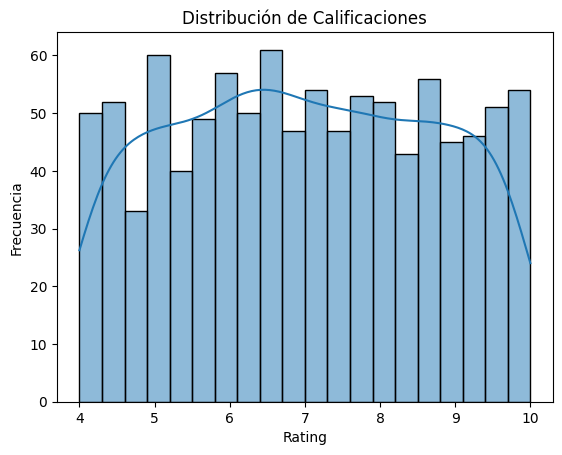

Skewness (Asimetria): 0.00900964876573073


In [7]:
sns.histplot(df['Rating'], kde=True, bins=20)
plt.title('Distribución de Calificaciones')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

print("Skewness (Asimetria):", df['Rating'].skew())

**Question 2:** Do aggregate sales numbers differ by much between branches?

  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


/tmp/ipykernel_71135/503919132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=branch_sales, x='Branch', y='Total', palette='pastel')


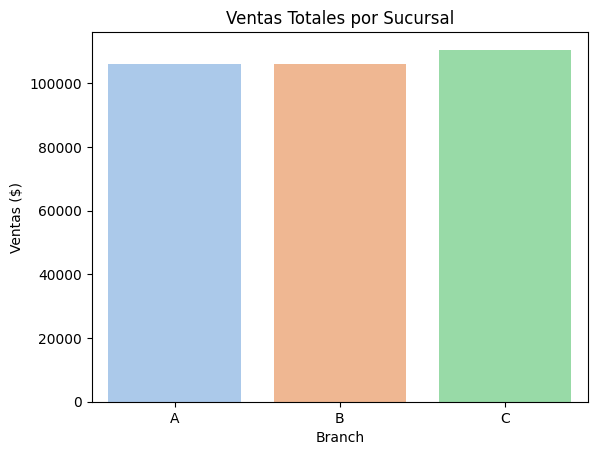

In [8]:
branch_sales = df.groupby('Branch')['Total'].sum().reset_index()
print(branch_sales)

sns.barplot(data=branch_sales, x='Branch', y='Total', palette='pastel')
plt.title("Ventas Totales por Sucursal")
plt.ylabel("Ventas ($)")
plt.show()

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

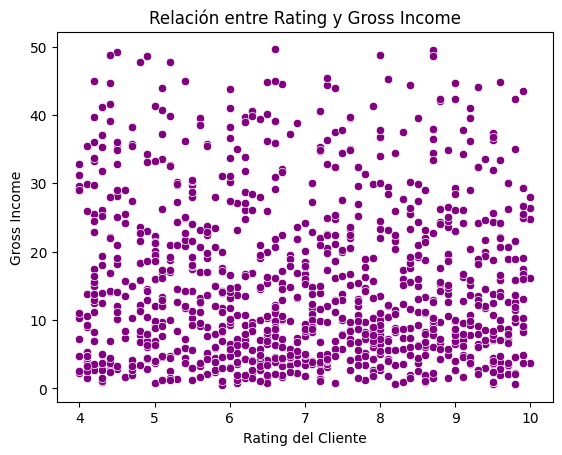

Correlación: -0.03644170499701839


In [ ]:
sns.scatterplot(data=df, x='Rating', y='gross income', color='purple')
plt.title("Relacion entre Rating y Gross Income")
plt.xlabel("Rating del Cliente")
plt.ylabel("Gross Income")
plt.show()

print("Correlación:", df['Rating'].corr(df['gross income']))

**Question 4:** Is there a noticeable time trend in gross income?

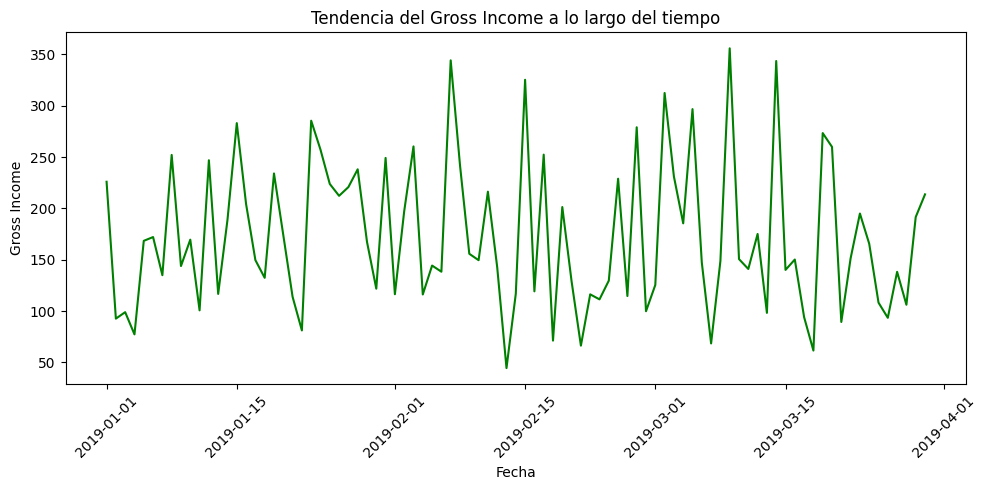

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
income_by_date = df.groupby('Date')['gross income'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(income_by_date['Date'], income_by_date['gross income'], color='green')
plt.title("Tendencia del Gross Income a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Gross Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Dealing With Duplicate Rows and Missing Values

In [12]:
#Verifica si hay duplicados
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 0


In [13]:
#Eliminar duplicados
df = df.drop_duplicates()

### Task 5: Correlation Analysis

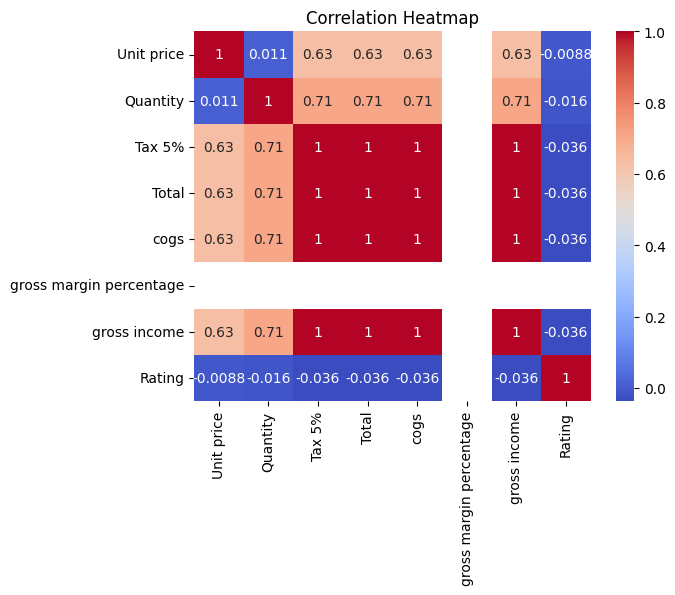

In [15]:
correlation = df.corr(numeric_only=True)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/